<a href="https://colab.research.google.com/github/tombraganca/Inteligente-Artificial/blob/main/Quinto_Trabalho_Pr%C3%A1tico_sobre_Redes_Neurais_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install tensorflow
import tensorflow as tf
print(tf.__version__)

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import warnings
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV 

In [62]:
dataTreinamento = pd.read_csv('/content/Materiais_Treinamento.txt')
dataTeste = pd.read_csv('/content/Materiais_Teste.txt')

In [63]:
entrada = dataTreinamento.iloc[:,0:3]
scaler = StandardScaler() # Normaliza dos Dados
entrada = scaler.fit_transform(entrada)

saida = dataTreinamento.iloc[:,3]

In [64]:
def trataSaida(table):
  for i in range(len(table)):
    if table.iloc[i] == 'Dúctil':
      table.iloc[i] = 1
    else:
      table.iloc[i] = 2

In [65]:
# trata a saída
trataSaida(saida)

saida.head()

<ipython-input-64-b75f16da8d79>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table.iloc[i] = 1
<ipython-input-64-b75f16da8d79>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table.iloc[i] = 2


0    1
1    1
2    1
3    1
4    1
Name: Tipo de Material (Dúctil ou Frágil), dtype: object

In [67]:
# Transforma os dados
tabela_de_treinamento = []

for i in range(len(saida)):
  linha = []
  for j in range(2):
    if (j+1) == saida[i]:
      linha += [1]
    else:
      linha += [0]
  tabela_de_treinamento.append(linha)
saida_treinamento = pd.DataFrame(data=tabela_de_treinamento,columns=['Dúctil', 'Frágil'])

saida_treinamento.head()

,Dúctil,Frágil
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:

# Otimizando o modelo
# Função para cria o modelo
def create_my_model(optimizer='adam'):
    # create model
    mymodel = Sequential()
    mymodel.add(Dense(12, input_dim=8, activation='relu'))
    mymodel.add(Dense(1, activation='sigmoid'))
    # Compile model
    mymodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return mymodel

# Cria o modelo
model = KerasClassifier(build_fn=create_my_model, epochs=30, batch_size=10)

# define o gride com os parametros de busca
optimizer = ['SGD','Adadelta', 'RMSprop', 'Adagrad','Adam']
parameter_grid = dict(optimizer=optimizer)


# Testa o gride
grid = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

In [68]:
modelo = Sequential()
modelo.add(Dense(3, input_dim=3, activation='relu'))
modelo.add(Dense(2, activation='sigmoid'))

# Compila o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Treina o Modelo
resultado = modelo.fit(entrada, saida_treinamento, batch_size = 400, epochs = 2000)

modelo.summary() # Mostra a rede


Epoch 1/2000
1/1 [==============================] - 1s 604ms/step - loss: 1.0203 - accuracy: 0.4107
Epoch 2/2000
1/1 [==============================] - 0s 12ms/step - loss: 1.0185 - accuracy: 0.4107
Epoch 3/2000
1/1 [==============================] - 0s 11ms/step - loss: 1.0167 - accuracy: 0.4107
Epoch 4/2000
1/1 [==============================] - 0s 13ms/step - loss: 1.0149 - accuracy: 0.4107
Epoch 5/2000
1/1 [==============================] - 0s 18ms/step - loss: 1.0131 - accuracy: 0.4107
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 1.0113 - accuracy: 0.4107
Epoch 7/2000
1/1 [==============================] - 0s 11ms/step - loss: 1.0096 - accuracy: 0.4107
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.0078 - accuracy: 0.4107
Epoch 9/2000
1/1 [==============================] - 0s 11ms/step - loss: 1.0061 - accuracy: 0.4107
Epoch 10/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.0043 - accuracy: 0.4107
Epoch 11

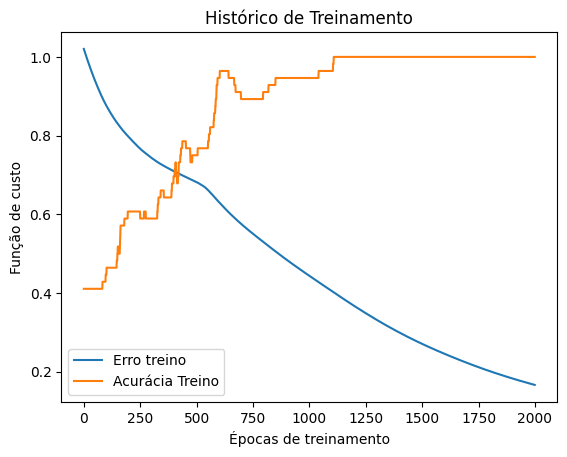

In [69]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['accuracy'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Acurácia Treino'])
plt.show()

In [70]:
entrada_testes = dataTeste.iloc[:,0:3] # Entrada dos Testes

entrada_testes = scaler.fit_transform(entrada_testes) # Normaliza dos Testes
entrada_testes

array([[-1.22406706, -0.98124461, -1.02880431],
       [-1.12818713, -1.42998452, -1.35493824],
       [ 0.15021188,  0.45472311,  0.66116242],
       [ 1.4286109 ,  0.99321101,  1.10589051],
       [ 1.58841078,  1.86077484,  1.69886129],
       [-0.80858738, -1.07099259, -1.11774993],
       [-0.6487875 ,  0.03589919, -0.10969959],
       [-0.42506767, -0.77183265, -0.791616  ],
       [-0.10546792,  0.15556317,  0.12748872],
       [ 1.1729311 ,  0.75388305,  0.80940512]])

In [75]:
# Testa a rede
saida_predito = modelo.predict(entrada_testes)
print("Valores Preditos:",saida_predito)
saida_predito1 = np.array([])
Y_Resposta1 = np.array([])
for i in saida_predito:
    Y_parte = ([1 if max(i)==y else 0 for y in i])
    print(Y_parte)
    saida_predito1 = np.concatenate((saida_predito1,Y_parte))
    for j in range(len(Y_parte)):
        if Y_parte[j]==1:
            Resp = [str(j+1) + " - " + ("Dúctil" if j+1 == 1 else "Frágil")]
    Y_Resposta1 = np.concatenate((Y_Resposta1,Resp))
Y_Resposta1 # Ver os Resuladados
Y_Resposta = pd.DataFrame(data=Y_Resposta1, dtype=np.str0, columns=['Dúctil ou Frágil'])
Y_Resposta # Ver a Resposta

1/1 [==============================] - 0s 37ms/step
Valores Preditos: [[0.7443328  0.21801403]
 [0.04621161 0.9726201 ]
 [0.8288834  0.13653739]
 [0.08326124 0.9274417 ]
 [0.7874107  0.06809355]
 [0.07606385 0.9510153 ]
 [0.8288834  0.13653739]
 [0.05295343 0.96849793]
 [0.8288834  0.13653739]
 [0.08580023 0.9435381 ]]
[1, 0]
[0, 1]
[1, 0]
[0, 1]
[1, 0]
[0, 1]
[1, 0]
[0, 1]
[1, 0]
[0, 1]


,Dúctil ou Frágil
0,1 - Dúctil
1,2 - Frágil
2,1 - Dúctil
3,2 - Frágil
4,1 - Dúctil
5,2 - Frágil
6,1 - Dúctil
7,2 - Frágil
8,1 - Dúctil
9,2 - Frágil
